In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.cross_validation import train_test_split
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
raw_file_train=pd.read_csv('training.csv')

In [3]:
raw_file_test=pd.read_csv('test.csv')

In [4]:
raw_all_data=pd.concat((raw_file_train.loc[:,'Student ID':'BS'],raw_file_test.loc[:,'Student ID':'BS']))

In [5]:
for i in raw_file_train.index:
    if raw_file_train.loc[i,'WS'] == 'J':
        raw_file_train.loc[i,'WS'] = 1
    if raw_file_train.loc[i,'WS'] == 'K':
        raw_file_train.loc[i,'WS'] = 2
    if raw_file_train.loc[i,'WS'] == 'L':
        raw_file_train.loc[i,'WS'] = 3
    if raw_file_train.loc[i,'WS'] == 'M':
        raw_file_train.loc[i,'WS'] = 4
    if raw_file_train.loc[i,'WS'] == 'N':
        raw_file_train.loc[i,'WS'] = 5
    if raw_file_train.loc[i,'WS'] == 'O':
        raw_file_train.loc[i,'WS'] = 6
    if raw_file_train.loc[i,'WS'] == 'P':
        raw_file_train.loc[i,'WS'] = 7
    if raw_file_train.loc[i,'WS'] == 'Q':
        raw_file_train.loc[i,'WS'] = 8
    if raw_file_train.loc[i,'WS'] == 'R':
        raw_file_train.loc[i,'WS'] = 9
    if raw_file_train.loc[i,'WS'] == 'S':
        raw_file_train.loc[i,'WS'] = 10
    if raw_file_train.loc[i,'WS'] == 'T':
        raw_file_train.loc[i,'WS'] = 11

In [6]:
for i in raw_file_test.index:
    if raw_file_test.loc[i,'WS'] == 'J':
        raw_file_test.loc[i,'WS'] = 1
    if raw_file_test.loc[i,'WS'] == 'K':
        raw_file_test.loc[i,'WS'] = 2
    if raw_file_test.loc[i,'WS'] == 'L':
        raw_file_test.loc[i,'WS'] = 3
    if raw_file_test.loc[i,'WS'] == 'M':
        raw_file_test.loc[i,'WS'] = 4
    if raw_file_test.loc[i,'WS'] == 'N':
        raw_file_test.loc[i,'WS'] = 5
    if raw_file_test.loc[i,'WS'] == 'O':
        raw_file_test.loc[i,'WS'] = 6
    if raw_file_test.loc[i,'WS'] == 'P':
        raw_file_test.loc[i,'WS'] = 7
    if raw_file_test.loc[i,'WS'] == 'Q':
        raw_file_test.loc[i,'WS'] = 8
    if raw_file_test.loc[i,'WS'] == 'R':
        raw_file_test.loc[i,'WS'] = 9
    if raw_file_test.loc[i,'WS'] == 'S':
        raw_file_test.loc[i,'WS'] = 10
    if raw_file_test.loc[i,'WS'] == 'T':
        raw_file_test.loc[i,'WS'] = 11

In [7]:
processed_train=raw_file_train.drop(['MCAT Total'], axis=1)
processed_test=raw_file_test.drop(['MCAT Total','Probablitiy of acceptance'], axis=1)

In [8]:
for i in processed_train.index:
    if processed_train.loc[i,'Answer key'] == 3:
        processed_train.loc[i,'Answer key'] = 0

In [9]:
processed_train["Undergrad Major Classification"]=""

In [10]:
major_categories=raw_all_data['Undergrad Major'].unique()
major_categories.sort()

In [11]:
major_categories

array(['African American Studies|Psychology',
       'African and African-American Studies', 'Anthropology',
       'Art History', 'Asian and African Languages and Literature|Biology',
       'Asian and African Literature and Languages|Biology',
       'Biological Anthropology & Anatomy|Biology',
       'Biological Anthropology and Anatomy',
       'Biological Anthropology and Anatomy|Biology', 'Biology',
       'Biology (Cell and Molecular)', 'Biology (Genetics Concentration)',
       'Biology (Neuroscience Concentration)',
       'Biology with a Concentration in Pharmacology',
       'Biology, Concentration in Cell & Molecular Biology',
       'Biology, Concentration in Evolutionary Biology',
       'Biology, with a concentration in Pharmacology|Psychology, with a concentration in Neuroscience',
       'Biology; Neuroscience concentration', 'Biology|Biology',
       'Biology|Biomedical Engineering', 'Biology|Chemistry',
       'Biology|Computer Science', 'Biology|History', 'Biology|M

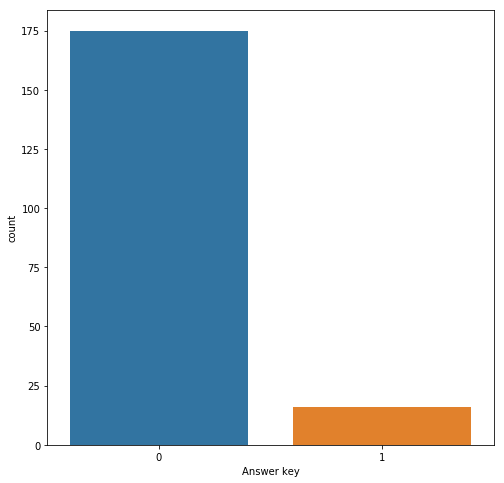

In [12]:
plt.subplots(figsize=(8,8))
sns.countplot(x='Answer key',data=processed_train)
plt.show()

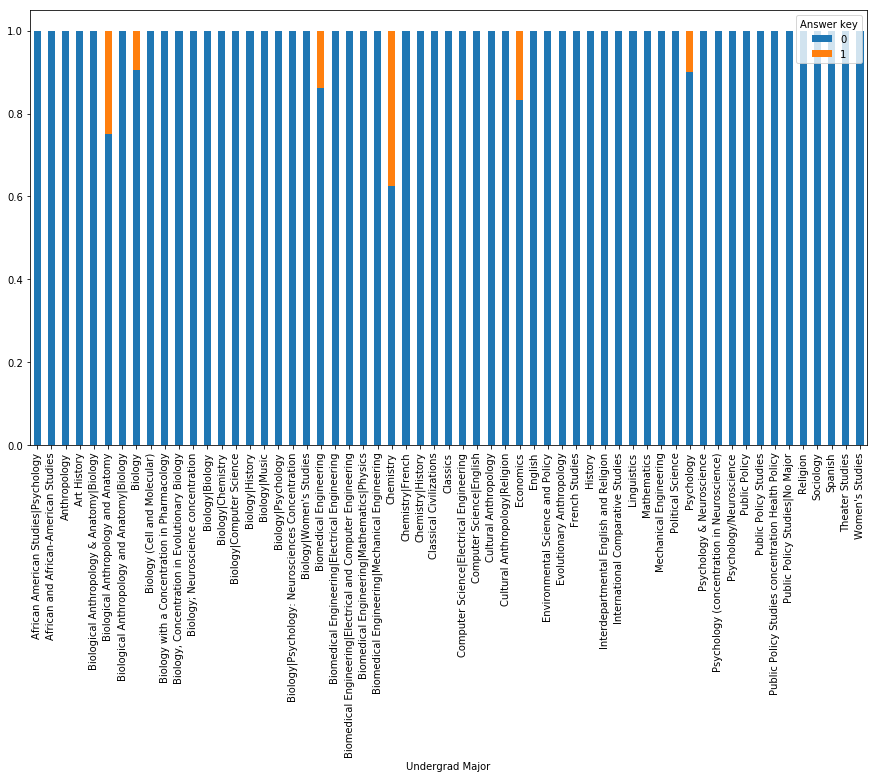

In [13]:
table=pd.crosstab(processed_train['Undergrad Major'], processed_train['Answer key'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(15,8)) 

In [14]:
#Will need to categorize(classify) the majors into a few categories.
# Category 1:- Biology, chemistry and psy
# Category 2:- All other Majors

In [15]:
for i in processed_train.index:
    if 'Bio' in processed_train.loc[i,'Undergrad Major'] or 'Chem' in processed_train.loc[i, 'Undergrad Major'] or 'Psy' in processed_train.loc[i, 'Undergrad Major'] or 'Econom' in processed_train.loc[i, 'Undergrad Major']:
        processed_train.loc[i,'Undergrad Major Classification'] = 'Major_accepted'
    else:
        processed_train.loc[i,'Undergrad Major Classification'] = 'Other'

In [16]:
processed_train=processed_train.drop(['Undergrad Major'],axis=1)

In [17]:
category_variables=['Undergrad Major Classification']
for var in category_variables:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(processed_train[var],prefix=var)
    raw_data1=processed_train.join(cat_list)
    processed_train=raw_data1

In [18]:
processed_train=processed_train.drop(['Undergrad Major Classification'],axis=1)

In [19]:
processed_train_x=pd.DataFrame(processed_train,columns=['CU BCPM GPA','CU AO GPA','CU CUM GPA','VR','PS','WS','BS','Undergrad Major Classification_Major_accepted','Undergrad Major Classification_Other'])
processed_train_y=pd.DataFrame(processed_train,columns=['Answer key'])

In [20]:
lin_reg=linear_model.LinearRegression().fit(processed_train_x, processed_train_y)

In [21]:
for i in processed_test.index:
    if 'Bio' in processed_test.loc[i,'Undergrad Major'] or 'Chem' in processed_test.loc[i, 'Undergrad Major'] or 'Psy' in processed_test.loc[i, 'Undergrad Major'] or 'Econom' in processed_test.loc[i, 'Undergrad Major']:
        processed_test.loc[i,'Undergrad Major Classification'] = 'Major_accepted'
    else:
        processed_test.loc[i,'Undergrad Major Classification'] = 'Other'

In [22]:
processed_test=processed_test.drop(['Undergrad Major'],axis=1)

In [23]:
category_variables=['Undergrad Major Classification']
for var in category_variables:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(processed_test[var],prefix=var)
    raw_data1=processed_test.join(cat_list)
    processed_test=raw_data1

In [24]:
processed_test=processed_test.drop(['Undergrad Major Classification'],axis=1)

In [25]:
processed_test_x=pd.DataFrame(processed_test,columns=['CU BCPM GPA','CU AO GPA','CU CUM GPA','VR','PS','WS','BS','Undergrad Major Classification_Major_accepted','Undergrad Major Classification_Other'])

In [26]:
lin_reg_predict=lin_reg.predict(processed_test_x)

In [27]:
for i in range(len(lin_reg_predict)):
    print(lin_reg_predict[i])

[ 0.17125142]
[ 0.24290367]
[ 0.18639178]
[ 0.05895891]
[ 0.03874209]
[ 0.07419954]
[-0.01019842]
[ 0.18122854]
[ 0.09965302]
[ 0.03215683]
[ 0.09155281]
[ 0.20572971]
[ 0.14748139]
[ 0.0346819]
[ 0.19318086]
[ 0.05153044]
[ 0.19881258]
[ 0.12252853]
[-0.04243452]
[ 0.10179441]
[ 0.07557059]
[ 0.10017228]
[ 0.20994414]
[ 0.05578519]
[ 0.12438004]
[ 0.09988914]
[ 0.06649216]
[ 0.20741798]
[ 0.0391715]
[ 0.09804771]
[-0.01194242]
[ 0.18397407]
[ 0.13294675]
[ 0.18629441]
[ 0.14089828]
[ 0.04069176]
[ 0.10638301]
[ 0.20505588]
[ 0.04397458]
[ 0.21497315]
[ 0.16832064]
[ 0.13025239]
[ 0.05337961]
[ 0.18757271]
[-0.05505992]
[ 0.00802477]
[ 0.14235345]
[ 0.19828864]
[ 0.1609552]
[ 0.07220792]
[ 0.22760836]
[ 0.18133476]
[ 0.06925267]
[ 0.00443484]
[ 0.14749647]
[ 0.01719599]
[ 0.08299876]
[ 0.18906558]
[ 0.15661037]
[ 0.18470216]
[ 0.16929902]
[ 0.03767358]
[ 0.03526714]
[ 0.10120078]
[ 0.08978118]
[ 0.1666592]
[ 0.14918636]
[ 0.04392785]
[ 0.11565003]
[ 0.16830783]
[ 0.22097245]
[ 0.080960